## 텐서플로란?

- 머신러닝을 사용하기 위한 라이브러리

## 케라스란?

- 딥러닝을 사용하기 위해서 유용하게 구성되어있는 API

## 텐서플로 시작하기

#### 상수 텐서와 변수

**모두 1 또는 모두 0인 텐서**

In [ ]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

# 모두 1

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

# 모두 0


tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**랜덤 텐서**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

# 랜덤값. 정규분포

tf.Tensor(
[[ 0.7739098]
 [-0.704533 ]
 [-0.1297141]], shape=(3, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

# 두 숫자 사이에서 랜덤하게 찾기

tf.Tensor(
[[0.18281317]
 [0.47518623]
 [0.16308796]], shape=(3, 1), dtype=float32)


**넘파이 배열에 값 할당하기**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
print(x)

#  특정 위치에 값 할당 

[[0. 1.]
 [1. 1.]]


**텐서플로 변수 만들기**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

# 텐서인데 값이 변경가능. 원래는 안되는 걸로

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.16022283],
       [ 0.18039992],
       [-0.15516429]], dtype=float32)>


In [ ]:
v.assign(tf.ones((3, 1)))

# 값 할당!

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**변수 일부에 값 할당하기**

In [ ]:
v[0, 0].assign(3.)

# 특정 위치에 값 할당

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**`assign_add` 사용하기**

- 위에 처럼 하는 방식은 백틱사용

In [ ]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### 텐서 연산: 텐서플로에서 수학 계산하기

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a) # 제곱
c = tf.sqrt(a) # 루트
d = b + c # 더하기
e = tf.matmul(a, b) # 행렬 곱
e *= d # 원소 곱

#### GradientTape API 다시 살펴 보기

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)
 # 원하는 함수에 대하야 gradient 계산

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(speed,acceleration)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


#### 엔드-투-엔드 예제: 텐서플로 선형 분류기

**2D 평면에 두 클래스의 랜덤한 포인트 생성하기**

In [ ]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
print(negative_samples)
print(positive_samples)

[[-0.51476442  3.36392971]
 [-0.94116056  2.81104101]
 [-1.18663733  2.65606517]
 ...
 [ 1.35357992  4.41283923]
 [-1.03462702  2.46407815]
 [-0.80031189  2.14492794]]
[[ 2.89010284 -0.2768751 ]
 [ 3.8457894   0.4416254 ]
 [ 2.53146951 -0.45771029]
 ...
 [ 3.22853738  1.49285586]
 [ 3.33512738 -1.3758338 ]
 [ 2.57770354  0.43576616]]


**두 클래스를 (2000, 2) 크기의 한 배열로 쌓기**

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(inputs.shape)

(2000, 2)


In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
print(targets.shape)

(2000, 1)


**두 클래스의 포인트를 그래프로 그리기**

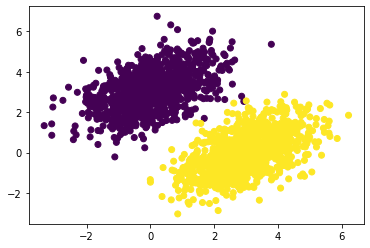

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

# 예전에 plot 사용했던거 같이 확인하면 좋음.

In [ ]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# 선형분류기 변수 생성

In [ ]:
def model(inputs):
    return tf.matmul(inputs, W) + b

    # 함수 정의

In [ ]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

    # 손실함수 정의

In [ ]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

    # 훈련과정 정의

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")
    # 총 40번 반복의 훈련

0번째 스텝의 손실: 6.8215
1번째 스텝의 손실: 1.0397
2번째 스텝의 손실: 0.2942
3번째 스텝의 손실: 0.1665
4번째 스텝의 손실: 0.1378
5번째 스텝의 손실: 0.1255
6번째 스텝의 손실: 0.1165
7번째 스텝의 손실: 0.1086
8번째 스텝의 손실: 0.1014
9번째 스텝의 손실: 0.0949
10번째 스텝의 손실: 0.0889
11번째 스텝의 손실: 0.0834
12번째 스텝의 손실: 0.0784
13번째 스텝의 손실: 0.0738
14번째 스텝의 손실: 0.0696
15번째 스텝의 손실: 0.0657
16번째 스텝의 손실: 0.0622
17번째 스텝의 손실: 0.0590
18번째 스텝의 손실: 0.0561
19번째 스텝의 손실: 0.0534
20번째 스텝의 손실: 0.0509
21번째 스텝의 손실: 0.0486
22번째 스텝의 손실: 0.0466
23번째 스텝의 손실: 0.0447
24번째 스텝의 손실: 0.0429
25번째 스텝의 손실: 0.0414
26번째 스텝의 손실: 0.0399
27번째 스텝의 손실: 0.0386
28번째 스텝의 손실: 0.0374
29번째 스텝의 손실: 0.0363
30번째 스텝의 손실: 0.0352
31번째 스텝의 손실: 0.0343
32번째 스텝의 손실: 0.0335
33번째 스텝의 손실: 0.0327
34번째 스텝의 손실: 0.0320
35번째 스텝의 손실: 0.0313
36번째 스텝의 손실: 0.0307
37번째 스텝의 손실: 0.0302
38번째 스텝의 손실: 0.0297
39번째 스텝의 손실: 0.0292


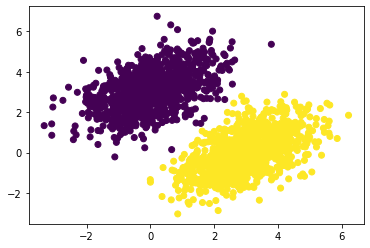

In [ ]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

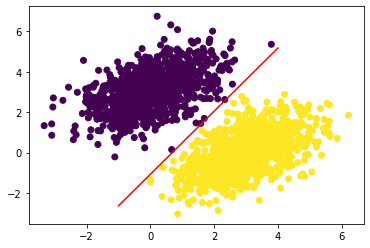

In [ ]:
x = np.linspace(-1, 4)
# 사실 100개의 x 축 좌표를 만들 필요 없이 시작과 종료 위치만 있어도 됩니다.

# 그래서 한번 해보았습니다

# x = [-1, 4]
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

## 신경망의 구조: 핵심 Keras API 이해하기

- 위에서 했던걸 keras를 통해 구현

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

        # 모델 쌓기
        # input의 개수가 있고 원하는 출력이 있으면 그만큼 dence 하게 해준다
        # 

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

# dense layer는 모든 것들을 연결하는 역할
# input이 784개면 32개로 내보내는 dence layer
# 좀 앞과는 다른 코드라고 말씀

(2, 32)


#### 자동 크기 추론: 동적으로 층 만들기

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

# 32개로 쌓는 layer 두개를 sequential하게 만드는 모델
# keras에서 주어주는 함수 사용

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

# 앞에서 정의한 class 사용한것

### 층에서 모델로

- “컴파일” 단계: 학습 과정 설정

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])
# 항상 gradient method 어떤거 쓸지, loss, metrics 뭘 쓸지 결정 

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
# 데이터를 집어넣어서 fit 하면 학습이 돌아간다.

Epoch 1/5
16/16 [==============================] - 1s 7ms/step - loss: 12.7373 - binary_accuracy: 0.3260
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 12.3293 - binary_accuracy: 0.3150
Epoch 3/5
16/16 [==============================] - 0s 5ms/step - loss: 11.9795 - binary_accuracy: 0.3075
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 11.6498 - binary_accuracy: 0.3005
Epoch 5/5
16/16 [==============================] - 0s 6ms/step - loss: 11.3270 - binary_accuracy: 0.2950


## 이 밑은 좀더 공부한 후에 살펴보기로 함

In [ ]:
history.history

{'loss': [12.737286567687988,
  12.32932186126709,
  11.979500770568848,
  11.649768829345703,
  11.326961517333984],
 'binary_accuracy': [0.32600000500679016,
  0.3149999976158142,
  0.3075000047683716,
  0.3005000054836273,
  0.29499998688697815]}

**`validation_data` 매개변수 사용하기**

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 7ms/step - loss: 0.4548 - binary_accuracy: 0.8671 - val_loss: 0.0497 - val_binary_accuracy: 0.9917
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0692 - binary_accuracy: 0.9600 - val_loss: 0.0500 - val_binary_accuracy: 0.9933
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0705 - binary_accuracy: 0.9679 - val_loss: 0.1523 - val_binary_accuracy: 0.7900
Epoch 4/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0772 - binary_accuracy: 0.9486 - val_loss: 0.0273 - val_binary_accuracy: 1.0000
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 0.0742 - binary_accuracy: 0.9600 - val_loss: 0.0362 - val_binary_accuracy: 0.9933


### 추론: 훈련한 모델 사용하기

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 [==============================] - 0s 3ms/step
[[ 0.6586506 ]
 [ 0.5634017 ]
 [ 0.02194044]
 [ 0.69642806]
 [ 0.07757977]
 [ 0.98463243]
 [-0.01207286]
 [ 0.2583052 ]
 [ 0.7966695 ]
 [ 0.08450723]]
